In [1]:
print("SyedAli Fathima, thangam Assalamualaikum....")

SyedAli Fathima, thangam Assalamualaikum....


In [333]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import logging

pd.options.display.float_format = '{:.4f}'.format

#Loading data from the files in to Pandas Dataframes
company_df = pd.read_csv('companies.txt', sep='\t', encoding='iso-8859-1')

#Unique companies
company_df['permalink'].unique().size
company_df.shape
company_df.isnull().sum()
company_df.isnull().any()
company_df.isnull().all()
#Removing unused columns
company_df = company_df.drop('homepage_url', axis=1)
company_df = company_df.drop('founded_at', axis=1)
company_df = company_df.drop('state_code', axis=1)
company_df = company_df.drop('region', axis=1)
company_df = company_df.drop('city', axis=1)
round(100*(company_df.isnull().sum()/len(company_df.index)),2)
company_df['permalink'].unique().size

66368

In [334]:
#Define function to retrieve Primary Category
def getPrimCategory(category_name):
    a_new_string =category_name[0:category_name.find('|')]
    return a_new_string
#print(getPrimCategory("SAF|Name"))

In [335]:
#Clean up company dataframe by removing null rows
100*(len(company_df[company_df.isnull().sum(axis=1)>1].index) / len(company_df.index))
company_df = company_df[company_df.isnull().sum(axis=1)<=1]
round(100*(company_df.isnull().sum()/len(company_df.index)),2)
company_df = company_df[company_df.category_list.notnull()]
company_df = company_df[company_df.country_code.notnull()]
round(100*(company_df.isnull().sum()/len(company_df.index)),2)

permalink       0.0000
name            0.0000
category_list   0.0000
status          0.0000
country_code    0.0000
dtype: float64

In [336]:
rounds_df = pd.read_csv('rounds2.csv', encoding='iso-8859-1')
#Making features consistencies for good mapping
rounds_df = rounds_df.rename({"company_permalink":"permalink"}, axis='columns')
rounds_df['permalink'] = rounds_df['permalink'].str.lower()
company_df['permalink'] = company_df['permalink'].str.lower()
#Data analysing
rounds_df.shape
rounds_df.isnull().sum()
#Removing unused features
rounds_df = rounds_df.drop('funding_round_code', axis=1)
rounds_df = rounds_df.drop('funded_at', axis=1)
round(100*(company_df.isnull().sum()/len(company_df.index)),2)
rounds_df.head()
rounds_df.isnull().any()
#Removing null rows
rounds_df = rounds_df[rounds_df.raised_amount_usd.notnull()]
rounds_df.isnull().any()
rounds_df.head()
rounds_df['permalink'].unique().size
rounds_df.head()


venture_fund_df = rounds_df.loc[rounds_df['funding_round_type'].isin(['venture']), :]
venture_fund_df.head(42)
venture_fund_comp_grp = venture_fund_df.groupby(['raised_amount_usd'])
venture_fund_comp_grp['permalink'].count().sort_values(ascending=False).head(42)

#fund_grp = rounds_df.groupby('funding_round_type')
#fund_grp['raised_amount_usd'].sum().sort_values(ascending=False).head(24)

raised_amount_usd
10000000.0000    1809
5000000.0000     1713
3000000.0000     1215
2000000.0000     1210
1000000.0000     1138
15000000.0000    1086
4000000.0000     1012
6000000.0000      978
20000000.0000     974
8000000.0000      862
7000000.0000      763
12000000.0000     738
1500000.0000      702
25000000.0000     567
30000000.0000     556
500000.0000       535
2500000.0000      526
3500000.0000      427
9000000.0000      410
11000000.0000     369
4500000.0000      331
7500000.0000      331
50000000.0000     317
16000000.0000     309
13000000.0000     307
14000000.0000     293
40000000.0000     292
5500000.0000      290
6500000.0000      287
18000000.0000     250
100000.0000       248
250000.0000       246
1200000.0000      241
200000.0000       238
35000000.0000     231
17000000.0000     214
150000.0000       177
22000000.0000     175
21000000.0000     174
1600000.0000      173
300000.0000       170
750000.0000       167
Name: permalink, dtype: int64

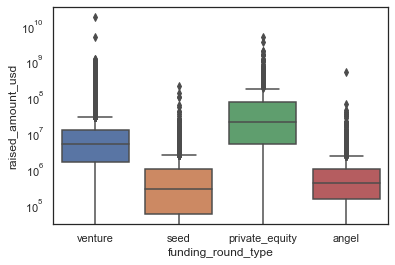

In [337]:
four_fund_df = rounds_df.loc[rounds_df['funding_round_type'].isin(['venture', 'angel', 'seed', 'private_equity']), :]
four_fund_df.head(42)
sns.set(style='white')
sns.boxplot(x='funding_round_type', y='raised_amount_usd', data=four_fund_df)
plt.yscale('log')
plt.show()
#venture_fund_comp_grp = venture_fund_df.groupby(['raised_amount_usd'])
#venture_fund_comp_grp['permalink'].count().sort_values(ascending=False).head(42)

In [338]:
#Merging/Combining company df and rounds df together as master df
master_frame = pd.merge(rounds_df, company_df, how='inner', on='permalink')
master_frame.head()
#Making data consistencies with mapping df
master_frame["category_list"] = master_frame["category_list"].apply(getPrimCategory)
master_frame['category_list'] = master_frame['category_list'].str.lower()
master_frame.head()


,permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.0000,#fame,medi,operating,IND
1,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,700000.0000,:Qounter,application platforms,operating,USA
2,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,2000000.0000,0-6.com,curated we,operating,CHN
3,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,41250.0000,01Games Technology,game,operating,HKG
4,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,43360.0000,Ondine Biomedical Inc.,biotechnolog,operating,CAN


In [339]:
master_frame.head()
selected_type = ['venture']
master_frame['funding_round_type'].unique()
master_frame = master_frame.loc[master_frame['funding_round_type'].isin(selected_type), :]
master_frame.head()


,permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.0000,#fame,medi,operating,IND
2,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,2000000.0000,0-6.com,curated we,operating,CHN
5,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,719491.0000,Ondine Biomedical Inc.,biotechnolog,operating,CAN
7,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,20000000.0000,H2O.ai,analytic,operating,USA
8,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,1700000.0000,H2O.ai,analytic,operating,USA


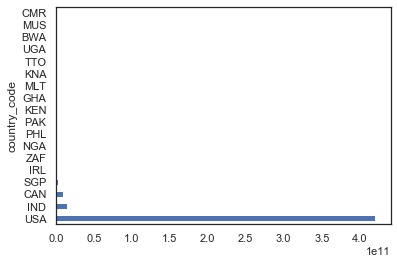

In [349]:
english_country_df = pd.read_csv('english_country.csv', encoding='iso-8859-1')
cnlist = list(english_country_df['country_code'])
#print(cnlist)
master_frame = master_frame.loc[master_frame['country_code'].isin(cnlist), :]
master_frame.head()

country_grp = master_frame.groupby('country_code')
country_grp['raised_amount_usd'].sum().sort_values(ascending=False).plot(kind='barh')
plt.show()


In [ ]:
fig = plt.figure()
ax = fig.add_axes(list(country_grp['raised_amount_usd'].sum().sort_values(ascending=False)))
langs = ['C', 'C++', 'Java', 'Python', 'PHP']
students = [23,17,35,29,12]
ax.bar(langs,students)
plt.show()

In [331]:
mapping_df = pd.read_csv('mapping.csv', encoding='iso-8859-1')
sector_str_list = list(mapping_df.columns)
print(sector_str_list)

['category_list', 'Automotive & Sports', 'Blanks', 'Cleantech / Semiconductors', 'Entertainment', 'Health', 'Manufacturing', 'News, Search and Messaging', 'Others', 'Social, Finance, Analytics, Advertising']


In [248]:
#Logic to convert widened features to narrowed features. Also used the sector number insteaf of sector name for this process.


mapping_df.columns = ['category_list', 1, 2, 3, 4, 5, 6, 7, 8, 9]
Sector_list = [1,2,3,4,5,6,7,8,9]

# Create an empty list 
Row_list =[] 
# Iterate over each row and create a list for each rows
for index, curr_row in mapping_df.iterrows(): 
    # Create list for the current row 
    my_list =[curr_row[1], curr_row[2], curr_row[3], curr_row[4], curr_row[5], curr_row[6], curr_row[7], curr_row[8], curr_row[9]] 
    # append the list to the final list 
    Row_list.append(my_list) 
cate_sector_list = []
# Print the list 
for saf in Row_list:
    sector = 0
    for i in range(len(saf)):
        sector += Sector_list[i]*saf[i]
    #print(sector)
    cate_sector_list.append(sector)
    #print()
cate_sector_list
sector_series = pd.Series(cate_sector_list)
mapping_df['sector'] = sector_series.values
#removing old wide columns 
mapping_df.drop(mapping_df.columns[[1,2,3,4,5,6,7,8,9]], axis = 1, inplace = True)
#Making data consitencies
mapping_df['category_list'] = mapping_df['category_list'].str.lower()
#Data analysis
mapping_df.head()
mapping_df.isnull().any()
#removing null rows
mapping_df = mapping_df[mapping_df.category_list.notnull()]
#Merging merged_inner with mapping_df 
master_frame_map_df = pd.merge(master_frame, mapping_df, how='inner', on='category_list')
master_frame_map_df.head()
master_frame_map_df.size

179235

In [278]:
#master_frame.loc[master_frame['funding_round_type'].isin(selected_type), :]
ind_df = master_frame_map_df.loc[master_frame_map_df['country_code'].isin(['IND']), :]
ind_df.head()
ind_df['raised_amount_usd'].sum()
len(ind_df.index)
ind_sector_grp = ind_df.groupby(['sector'])
#merged_company_map_grp['permalink'].count().sort_values(ascending=False).head(42)
ind_sector_grp['raised_amount_usd'].sum().sort_values(ascending=False).head(42)
ind_sector_grp['permalink'].count().sort_values(ascending=False).head(42)

ind_sector_df = ind_df.loc[ind_df['sector']==8, :]
ind_sector_df.head(42)
ind_sector_comp_grp = ind_sector_df.groupby(['permalink'])
ind_sector_comp_grp['permalink'].count().sort_values(ascending=False).head(42)

permalink
/organization/flipkart                                                                  9
/organization/delhivery                                                                 4
/organization/urban-ladder                                                              4
/organization/limeroad                                                                  3
/organization/caratlane                                                                 3
/organization/comat-technologies                                                        3
/organization/citrus                                                                    3
/organization/bigbasket-com                                                             3
/organization/vserv                                                                     3
/organization/fashion-you                                                               3
/organization/hotelogix                                                                 2


In [276]:
usa_df = master_frame_map_df.loc[master_frame_map_df['country_code'].isin(['USA']), :]
usa_df.head()
usa_sector_grp = usa_df.groupby(['sector'])
#merged_company_map_grp['permalink'].count().sort_values(ascending=False).head(42)
usa_df['raised_amount_usd'].sum()
len(usa_df.index)
usa_sector_grp['raised_amount_usd'].sum().sort_values(ascending=False).head(42)
usa_sector_grp['permalink'].count().sort_values(ascending=False).head(42)

usa_sector_df = usa_df.loc[usa_df['sector']==7, :]
usa_sector_df.head(42)
usa_sector_comp_grp = usa_sector_df.groupby(['permalink'])
usa_sector_comp_grp['permalink'].count().sort_values(ascending=False).head(42)

permalink
/organization/aperto-networks              13
/organization/sand-2                       11
/organization/airspan-networks             11
/organization/glasshouse-technologies      11
/organization/verisilicon-holdings         10
/organization/box                          10
/organization/intransa                     10
/organization/kareo                         8
/organization/bridgewave                    8
/organization/actelis-networks              8
/organization/fango                         8
/organization/mongodb-inc                   8
/organization/soasta                        8
/organization/pinterest                     8
/organization/axcient                       7
/organization/snaplogic                     7
/organization/yesvideo                      7
/organization/alert-logic                   7
/organization/apigee                        7
/organization/photobucket                   7
/organization/relayrides                    7
/organization/ifbyphone 

In [351]:
can_df = master_frame_map_df.loc[master_frame_map_df['country_code'].isin(['CAN']), :]
can_df.head()
can_sector_grp = can_df.groupby(['sector'])
#merged_company_map_grp['permalink'].count().sort_values(ascending=False).head(42)
can_sector_grp['raised_amount_usd'].sum().sort_values(ascending=False).head(42)
can_df['raised_amount_usd'].sum()
len(can_df.index)
can_sector_grp['raised_amount_usd'].sum().sort_values(ascending=False).head(42)
can_sector_grp['permalink'].count().sort_values(ascending=False).head(42)

can_sector_df = can_df.loc[can_df['sector']==8, :]
can_sector_df.head(42)
can_sector_comp_grp = can_sector_df.groupby(['permalink'])
can_sector_comp_grp['permalink'].count().sort_values(ascending=False).head(42)

permalink
/organization/creation-technologies     9
/organization/teradici                  6
/organization/coveo                     5
/organization/lxdata                    4
/organization/kobo                      3
/organization/payfirma-corporation      2
/organization/flybits                   2
/organization/embotics-corporation      2
/organization/voipshield-systems        2
/organization/desire2learn              2
/organization/inetco-systems-limited    2
/organization/extreme-startups          2
/organization/shop-ca                   2
/organization/tungle                    2
/organization/vivonet                   2
/organization/cml-versatel              1
/organization/epresence                 1
/organization/clearpath-robotics        1
/organization/cymax                     1
/organization/busbud                    1
/organization/demeure                   1
/organization/bistro-corp               1
/organization/avidretail                1
/organization/algolux   

In [352]:
can_sector_grp['permalink'].count().sort_values(ascending=False).head(42)

sector
9    115
8     75
7     67
3     55
4     42
6     36
5     21
1     14
Name: permalink, dtype: int64

In [249]:
merged_company_map_grp = master_frame_map_df.groupby(['country_code', 'sector'])
#merged_company_map_grp['permalink'].count().sort_values(ascending=False).head(42)
merged_company_map_grp['raised_amount_usd'].sum().sort_values(ascending=False).head(42)

country_code  sector
USA           9        54141754512.0000
              7        32032266392.0000
              3        31597353896.0000
              8        31465424097.0000
              4        14489766139.0000
              6        12725795289.0000
              5        12167644613.0000
              1        10662714907.0000
CHN           9         4738081729.0000
              7         4492486057.0000
IND           8         3926491918.0000
CHN           5         3703661327.0000
              8         2663857331.0000
              6         2416397387.0000
GBR           9         1997436174.0000
IND           1         1489700000.0000
CHN           4         1436291250.0000
SWE           7         1271263223.0000
GBR           8         1181457289.0000
              3         1156556689.0000
CAN           9         1030244796.0000
FRA           9         1028532479.0000
GBR           7          910971290.0000
ISR           9          896241505.0000
CHN           1    

<BarContainer object of 3 artists>

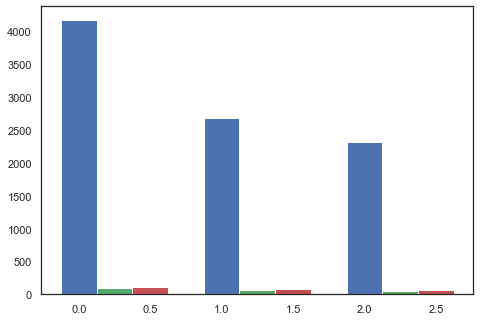

In [359]:
data = [[4175, 2689, 2317],
[101,58,52],
[115,75,67]]

X = np.arange(3)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'r', width = 0.25)